In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('mushrooms.csv')

In [57]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [58]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## The Data

<img src="mushroom.jpg" width="400" height="400">

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d


**THIS IS IMPORTANT, THIS IS NOT OUR TYPICAL PREDICTIVE MODEL!**

Our general goal here is to see if we can harness the power of machine learning and boosting to help create not just a predictive model, but a general guideline for features people should look out for when picking mushrooms.

In [59]:
df.shape

(8124, 23)

<AxesSubplot:xlabel='class', ylabel='count'>

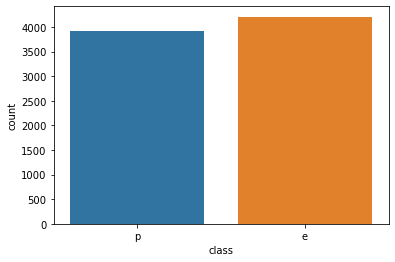

In [60]:
sns.countplot(data = df, x='class')

In [61]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [62]:
feat_uniq = df.describe().transpose().reset_index().sort_values('unique')
feat_uniq

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


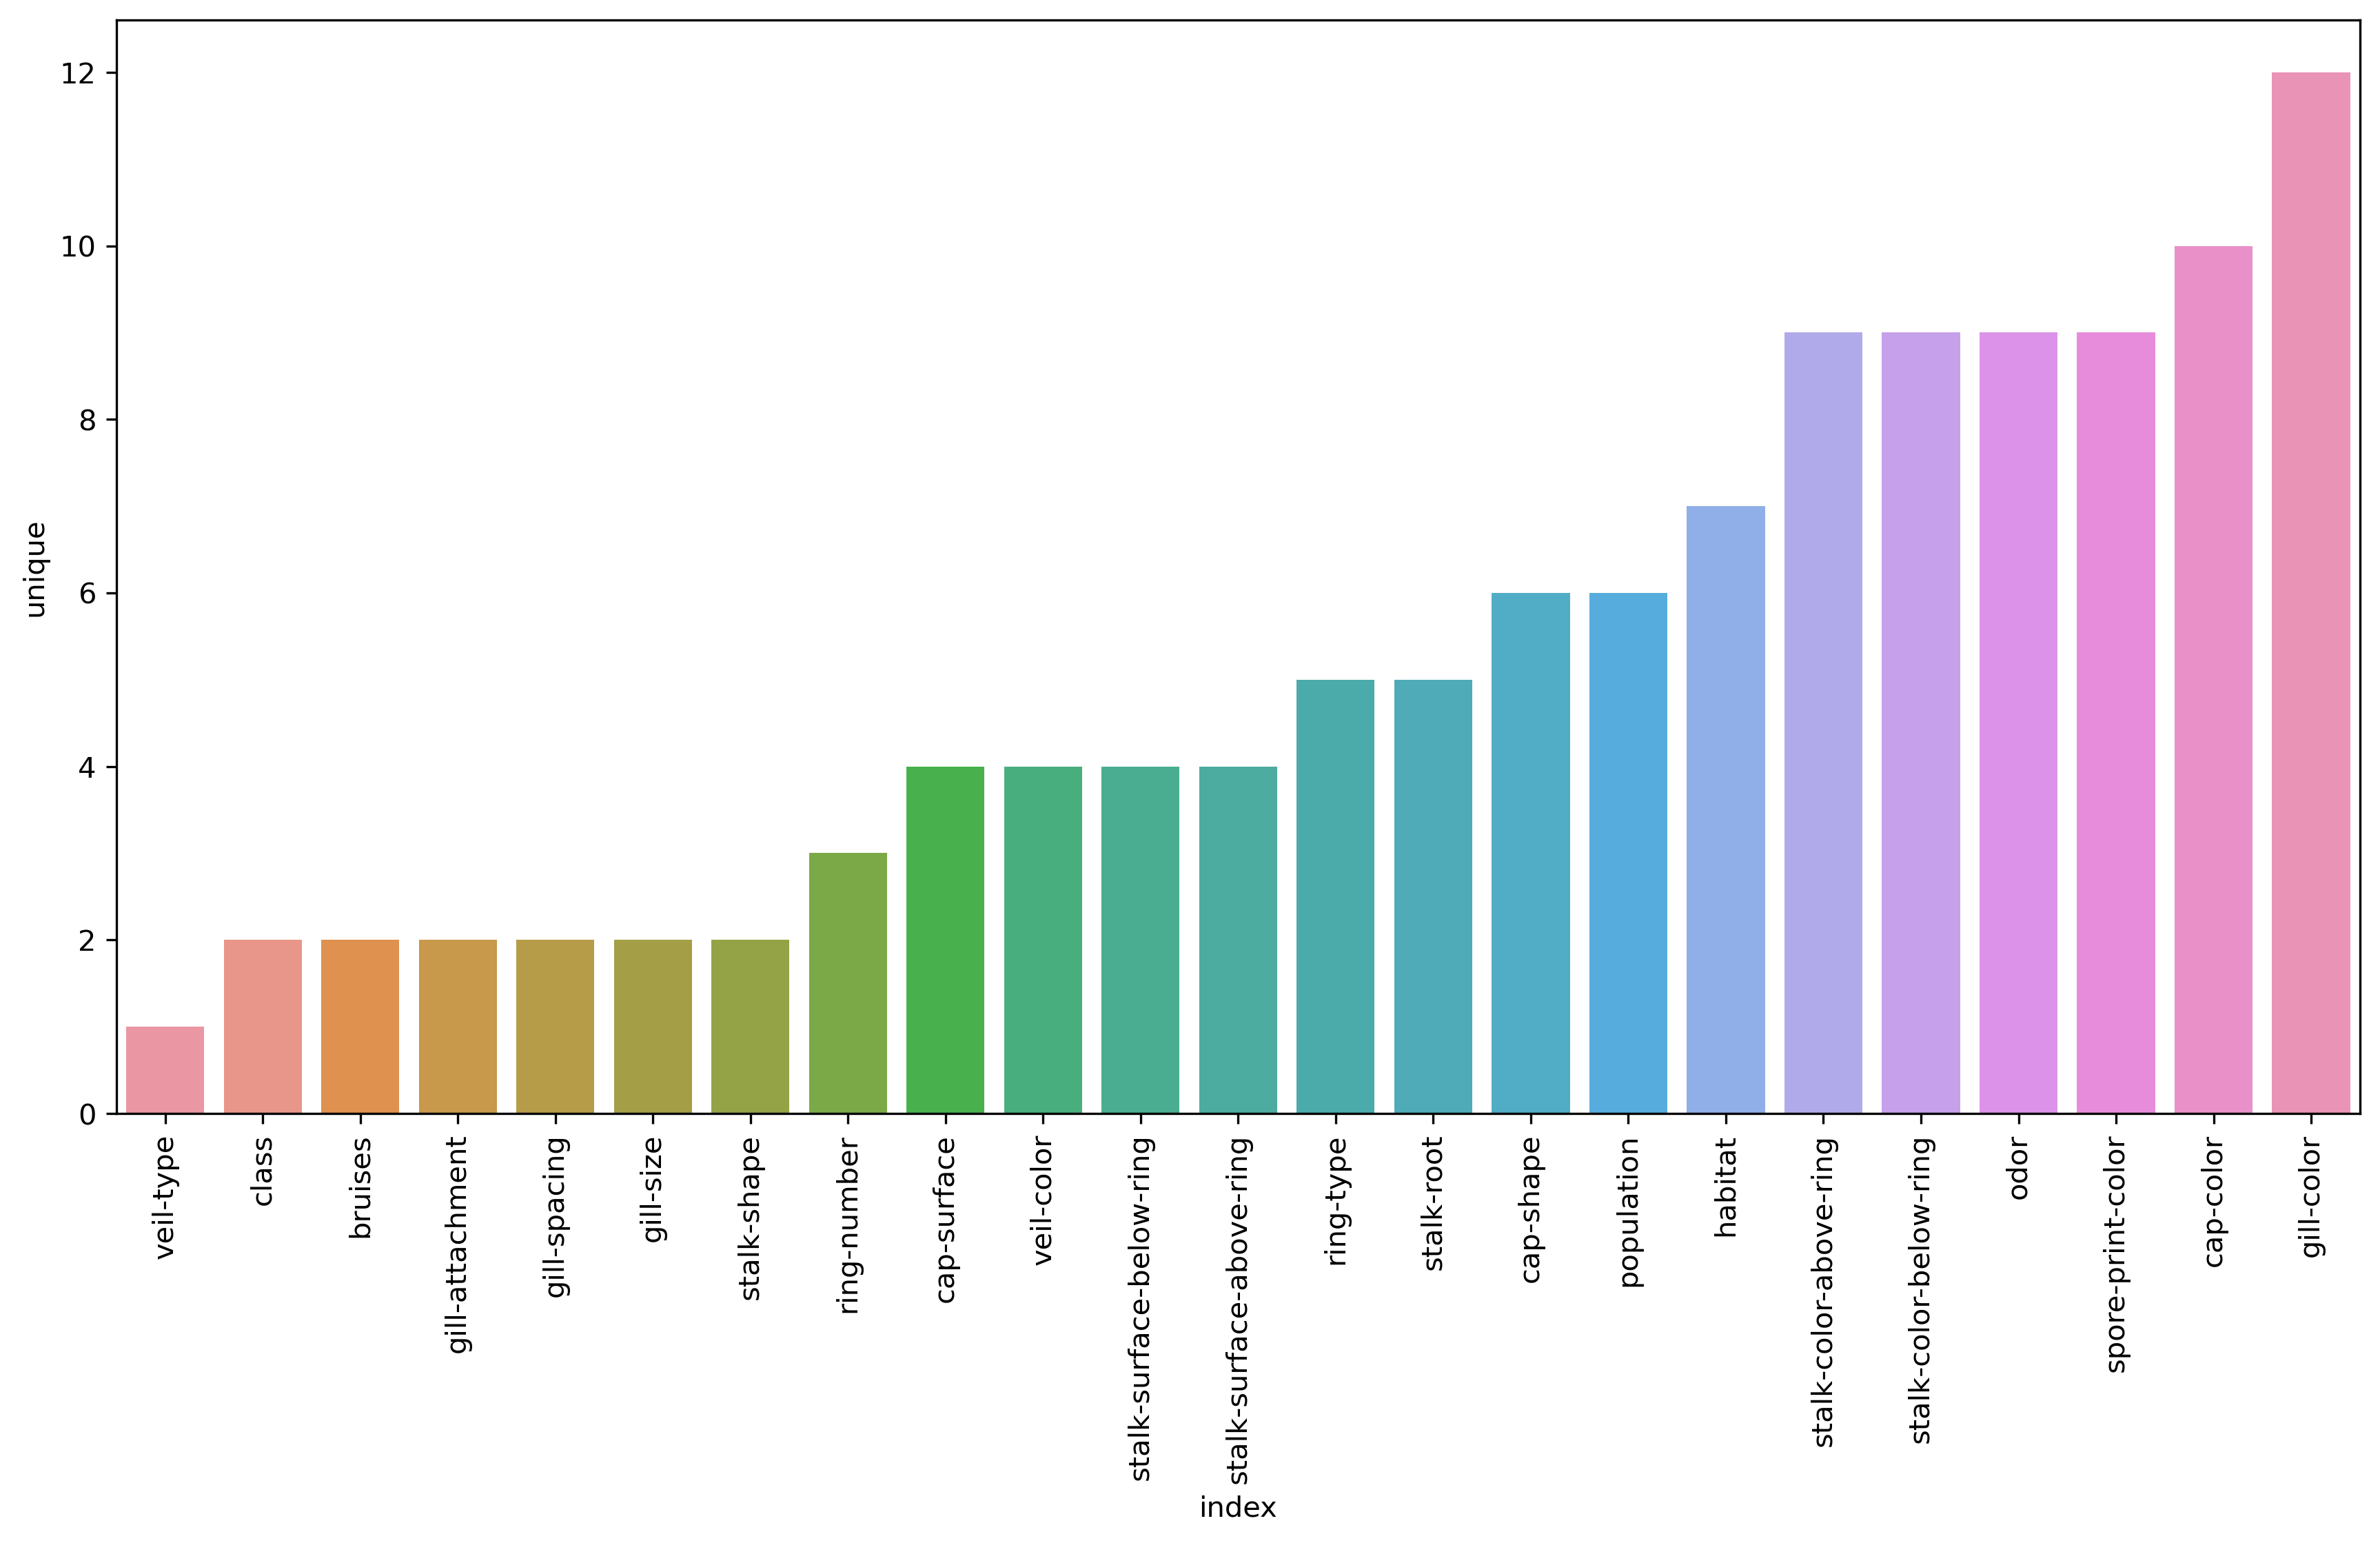

In [63]:
plt.figure(figsize=(14,7), dpi = 300)
sns.barplot(data = feat_uniq, x = 'index', y = 'unique')
plt.xticks(rotation=90);

In [64]:
X = df.drop('class', axis = 1)

In [65]:
X = pd.get_dummies(X, drop_first=True)

In [66]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [67]:
y = df['class']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [71]:
from sklearn.ensemble import AdaBoostClassifier

In [91]:
model = AdaBoostClassifier(n_estimators=18)

In [92]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=18)

In [93]:
predictions = model.predict(X_test)

In [94]:
np.sum(predictions != y_test)

0

In [95]:
len(y_test)

1219

In [96]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [97]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [100]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05555556, 0.05555556, 0.05555556,
       0.        , 0.        , 0.11111111, 0.05555556, 0.        ,
       0.        , 0.        , 0.        , 0.16666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05555556, 0.        , 0.        , 0.        , 0.        ,
       0.05555556, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05555556, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [104]:
feat = pd.DataFrame(index = X.columns, data = model.feature_importances_, columns=['Importance'])
imp_feat = feat[feat['Importance']>0]
imp_feat.sort_values('Importance')

,Importance
bruises_t,0.055556
odor_c,0.055556
odor_f,0.055556
odor_p,0.055556
stalk-surface-above-ring_k,0.055556
stalk-surface-below-ring_y,0.055556
stalk-color-below-ring_n,0.055556
spore-print-color_r,0.055556
population_c,0.055556
odor_n,0.111111


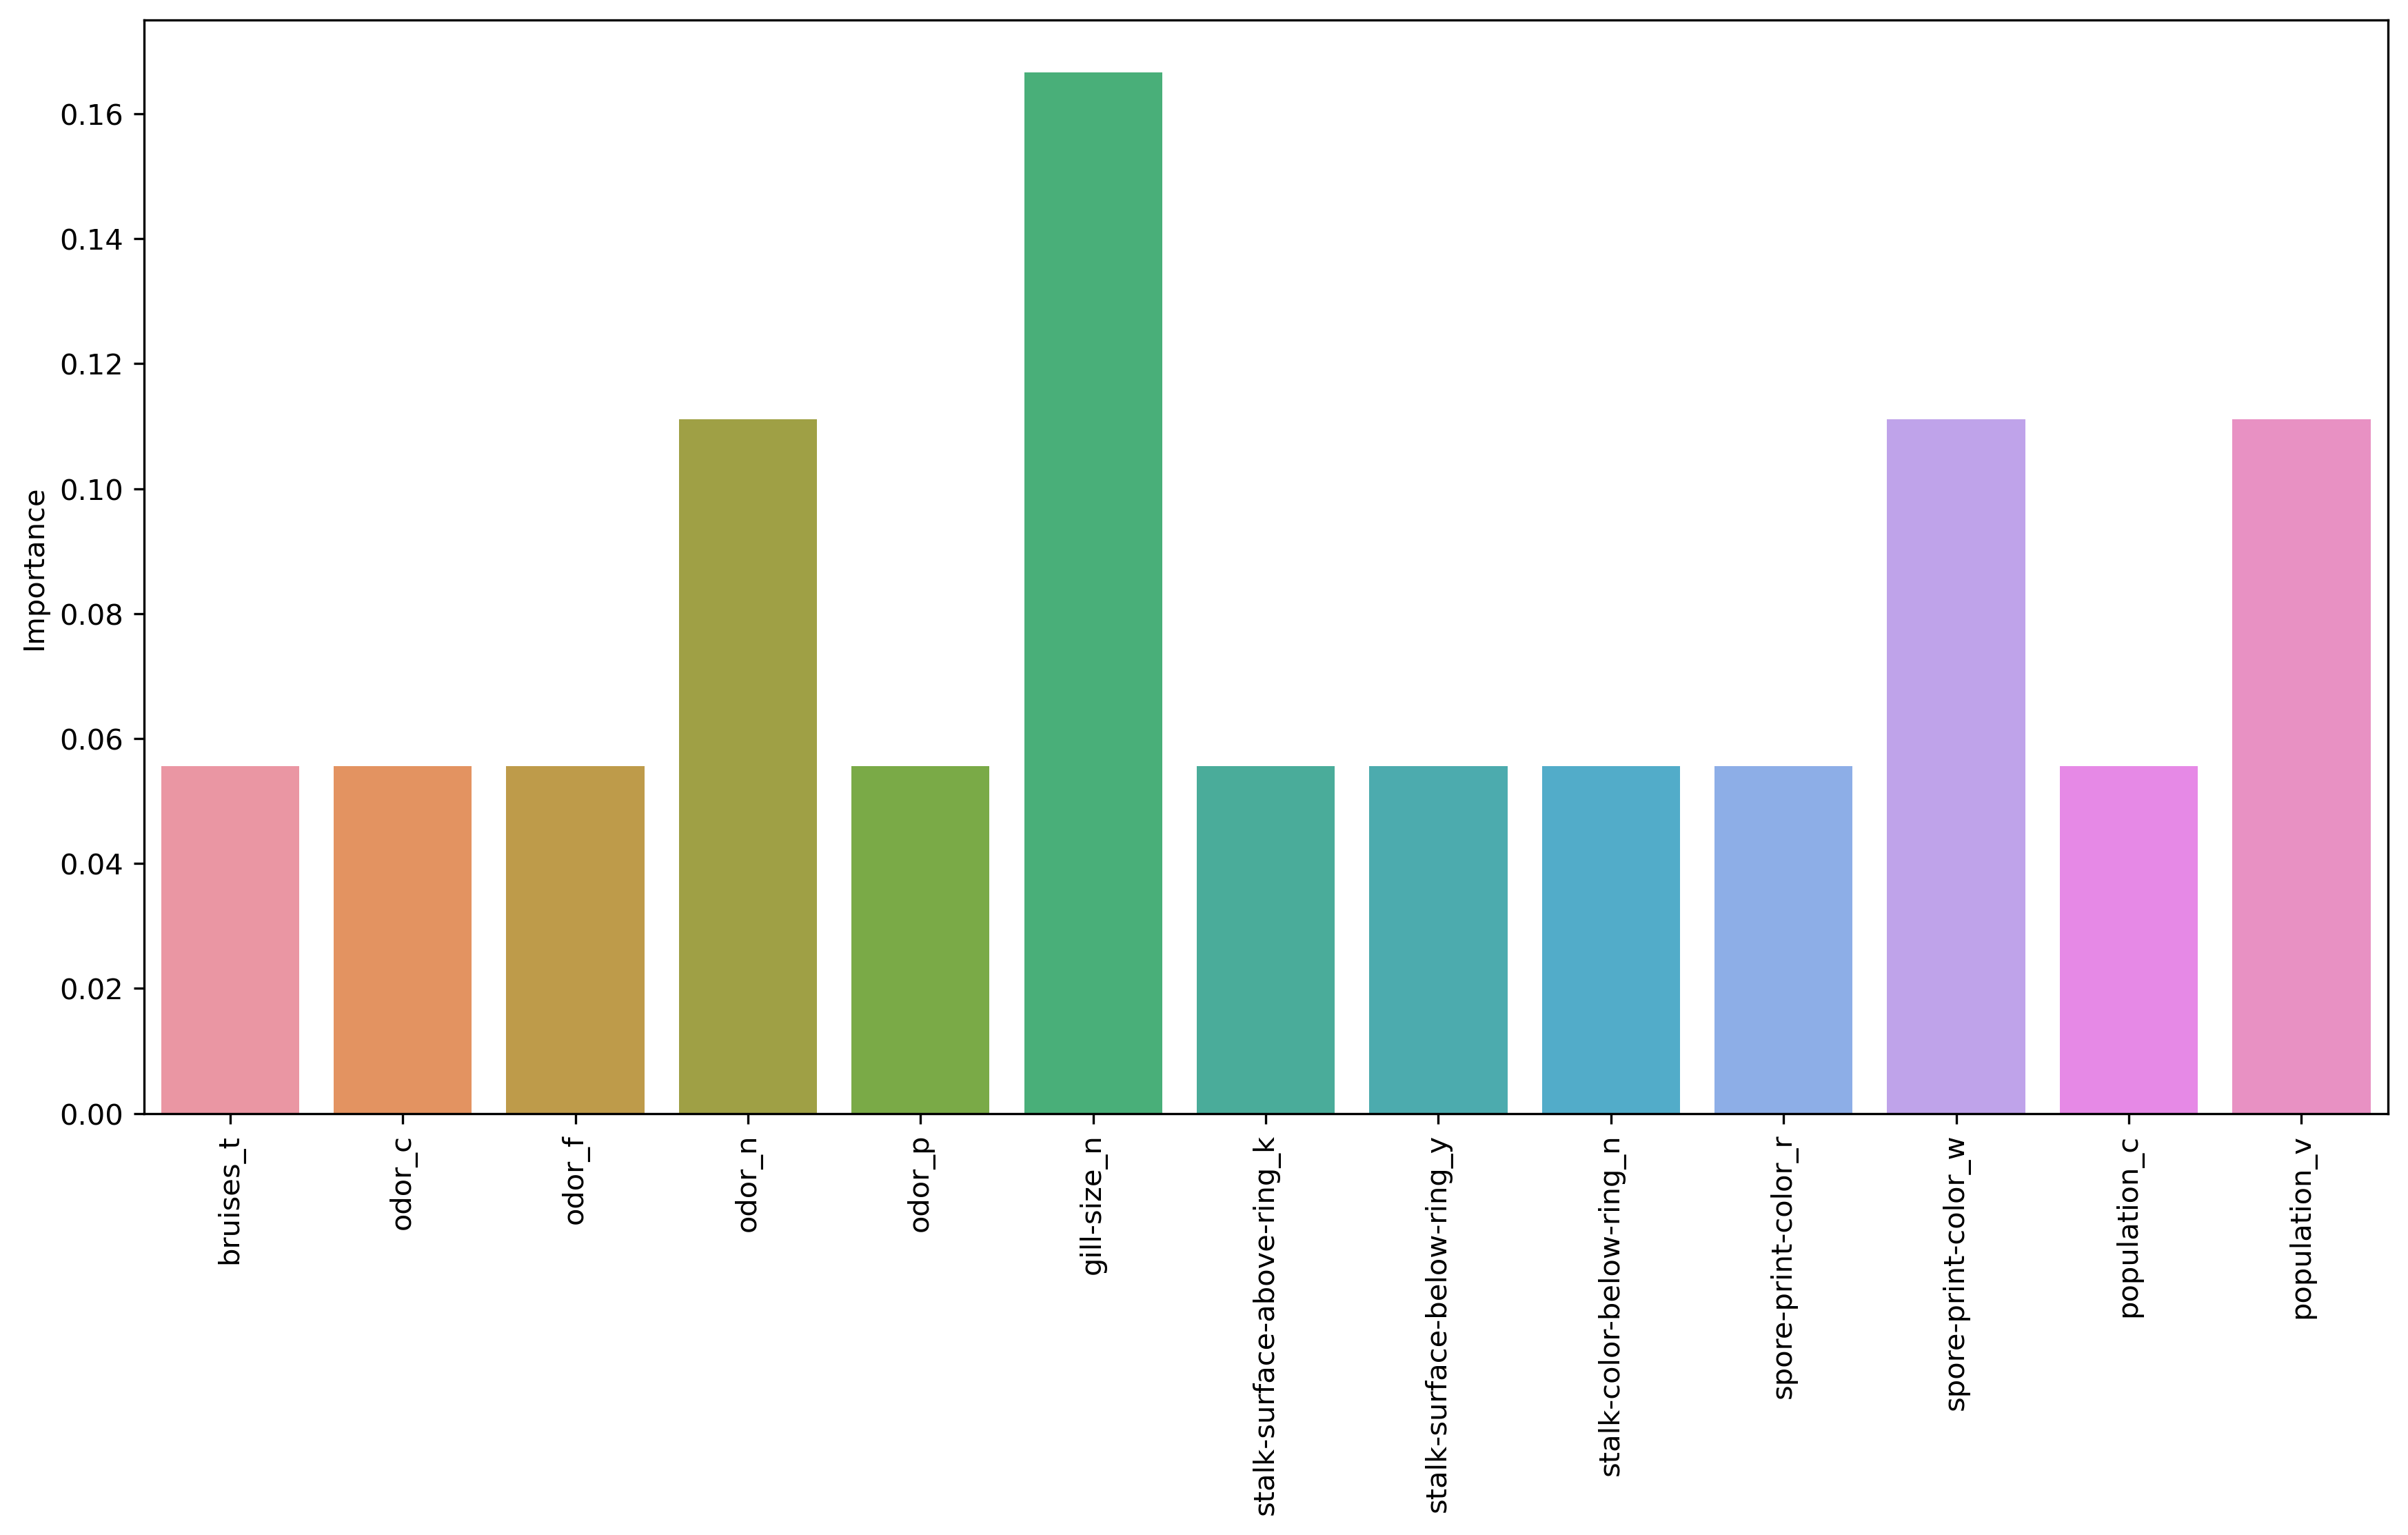

In [105]:
plt.figure(figsize=(14,7), dpi = 300)
sns.barplot(data = imp_feat, x = imp_feat.index, y = 'Importance')
plt.xticks(rotation = 90);

In [99]:
model.feature_importances_.argmax()

28

In [89]:
X.columns[22]

'odor_n'

In [90]:
len(X.columns)

95

<AxesSubplot:xlabel='odor', ylabel='count'>

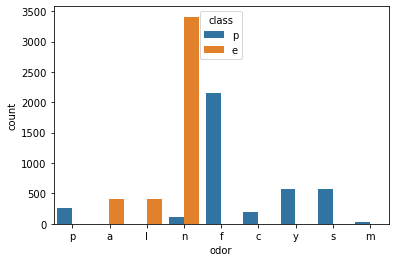

In [40]:
sns.countplot(data = df, x= 'odor', hue='class')

In [42]:
error_rates = []

for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    err = 1-accuracy_score(predictions, y_test)
    error_rates.append(err)

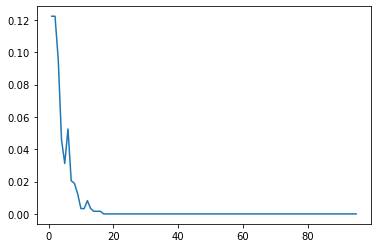

In [43]:
plt.plot(range(1,96),error_rates)

In [45]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.05263158, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

In [47]:
feat = pd.DataFrame(index = X.columns, data = model.feature_importances_, columns=['Importance'])

In [51]:
imp_feat = feat[feat['Importance']>0]
imp_feat

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


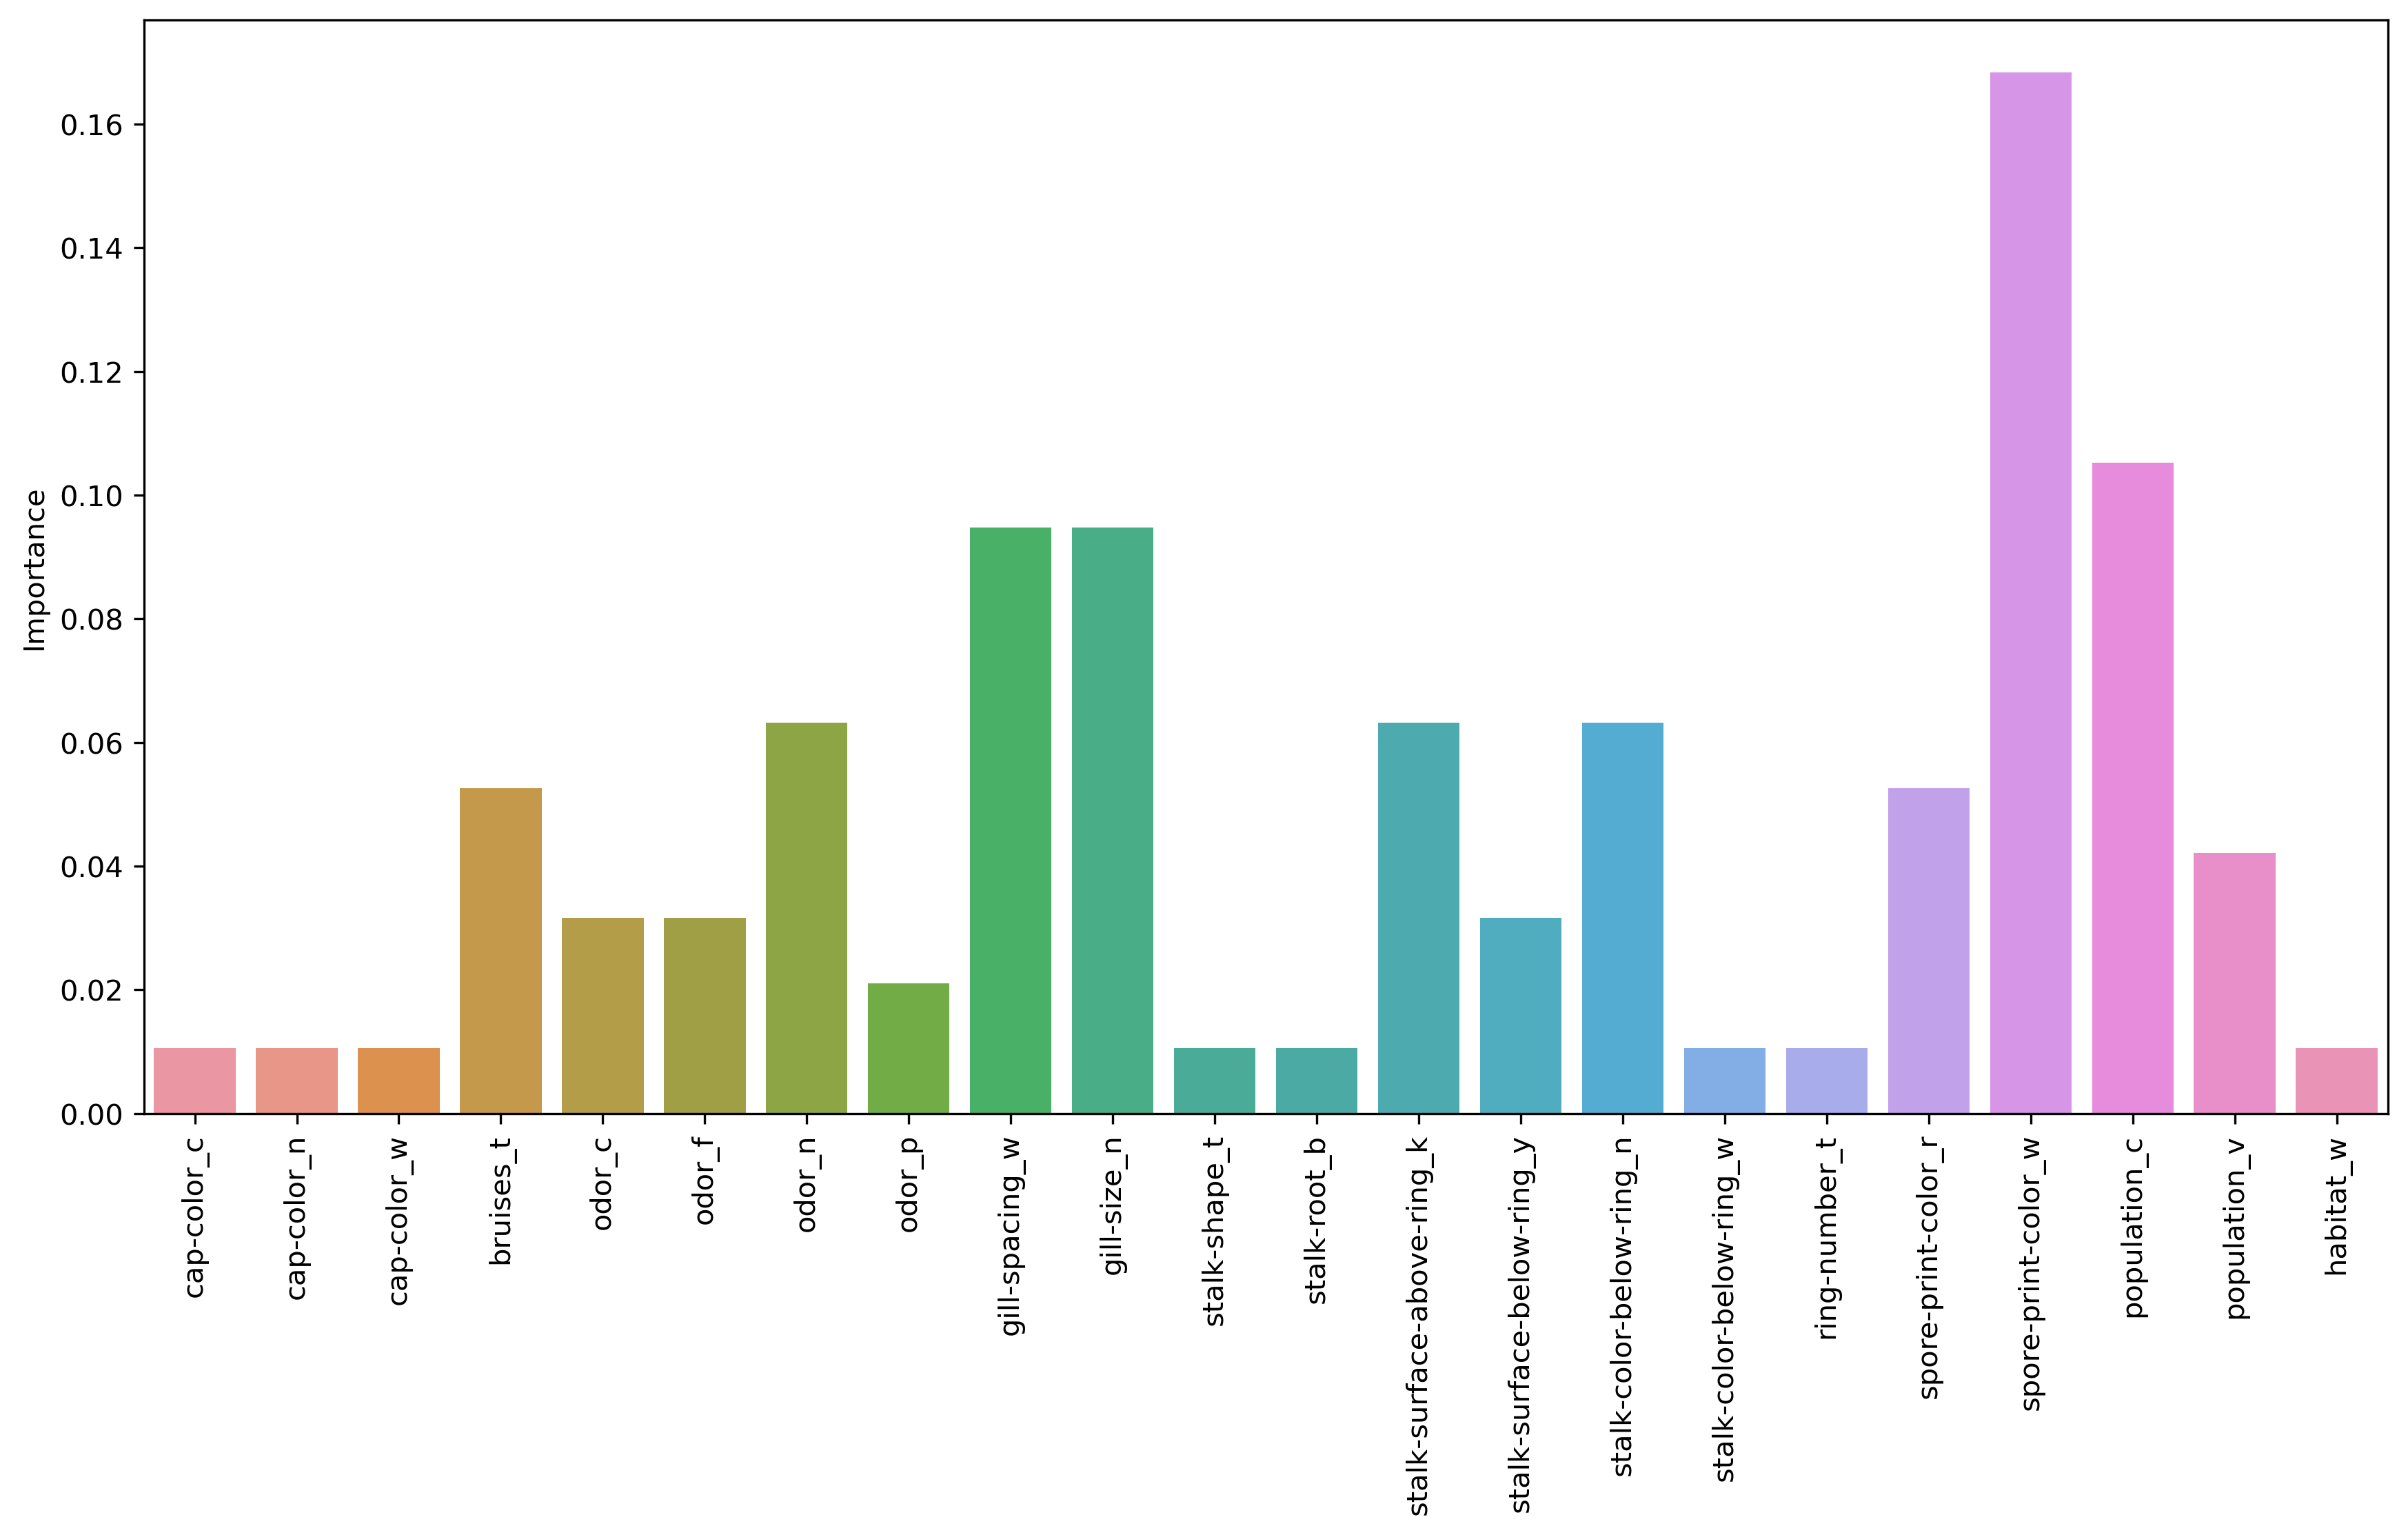

In [54]:
plt.figure(figsize=(14,7), dpi = 300)
sns.barplot(data = imp_feat, x = imp_feat.index, y = 'Importance')
plt.xticks(rotation = 90);

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [108]:
param_grid = {'n_estimators': [50,100],
             'learning_rate':[0.1,0.05, 0.2],
             'max_depth':[3,4,5]}

In [109]:
gb_model = GradientBoostingClassifier()

In [110]:
grid = GridSearchCV(gb_model, param_grid)

In [111]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [112]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [113]:
preds = grid.predict(X_test)

In [114]:
preds

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [115]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [116]:
grid.best_estimator_

GradientBoostingClassifier()

In [117]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [119]:
feat_imp=grid.best_estimator_.feature_importances_

In [120]:
imp_feat = pd.DataFrame(index=X.columns, data = feat_imp, columns=['Importance'])

In [123]:
imp_feat = imp_feat[imp_feat['Importance']>0.01]
imp_feat

,Importance
bruises_t,0.052256
odor_f,0.021116
odor_l,0.018250
odor_n,0.614744
gill-spacing_w,0.012820
gill-size_n,0.010809
stalk-root_c,0.136012
stalk-root_r,0.022919
stalk-surface-below-ring_y,0.043297
spore-print-color_r,0.030495


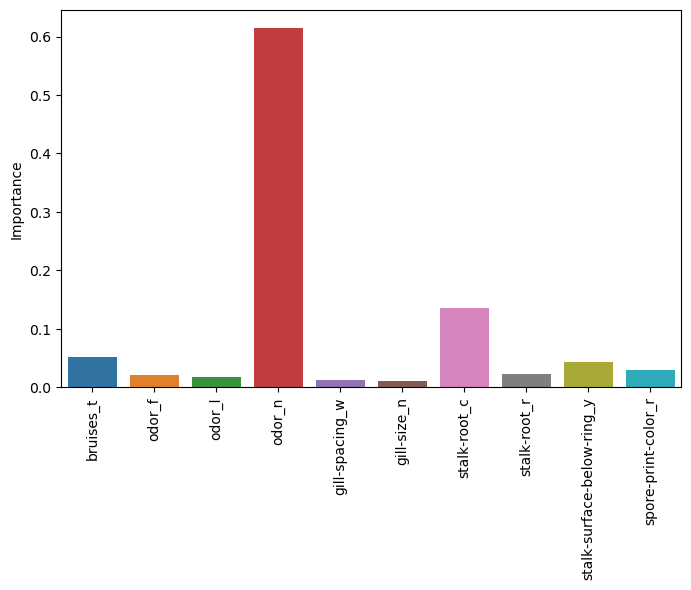

In [129]:
plt.figure(figsize=(8,5), dpi = 100)

sns.barplot(data = imp_feat, x= imp_feat.index, y = 'Importance')
plt.xticks(rotation = 90);